<a href="https://colab.research.google.com/github/Mi1kDev/CST3133_CW/blob/alam/CST3133_CourseWork_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Coursework Part 1


Connecting the project to google drive for easy members access

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 1.1.1 Dataset Selection and Problem Definition

-- clustering problem

-- database from kaggle link bellow

https://www.kaggle.com/code/mervanmunis/bank-transaction-for-fraud-detection-eda-ml



In [2]:
# importing all necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/drive/MyDrive/CST3133_CW/datasets/test.csv")
print(dataset.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [4]:
print(dataset.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# 1.1.2 Data Preprocessing

Handle missing values appropriately, as required.

Scale/normalize numerical features and encode categorical variable, as required.

Conduct logical feature selection or engineering, as required.

In [6]:
# Checking for missing values
missing_values = ["n/a", "na", "--"]
print(dataset.isnull().sum())
print(dataset.isnull().sum().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
0


In [20]:
#Normalization of data using min-max feature scaling
dataset['NormalizedTransactionAmount'] = (dataset['TransactionAmount'] - dataset['TransactionAmount'].min()) / (dataset['TransactionAmount'].max() - dataset['TransactionAmount'].min())
dataset['NormalizedCustomerAge'] = (dataset['CustomerAge'] - dataset['CustomerAge'].min()) / (dataset['CustomerAge'].max() - dataset['CustomerAge'].min())
dataset['NormalizedTransactionDuration'] = (dataset['TransactionDuration'] - dataset['TransactionDuration'].min()) / (dataset['TransactionDuration'].max() - dataset['TransactionDuration'].min())
dataset['NormalizedLoginAttempts'] = (dataset['LoginAttempts'] - dataset['LoginAttempts'].min()) / (dataset['CustomerAge'].max() - dataset['CustomerAge'].min())
dataset['NormalizedAccountBalance'] = (dataset['AccountBalance'] - dataset['AccountBalance'].min()) / (dataset['AccountBalance'].max() - dataset['AccountBalance'].min())

# 1.1.3 Exploratory Data Analysis

Create insightful visualizations, e.g., histograms and correlation heatmaps.

Identify and comment on trends, patterns, and potential biases in the data.

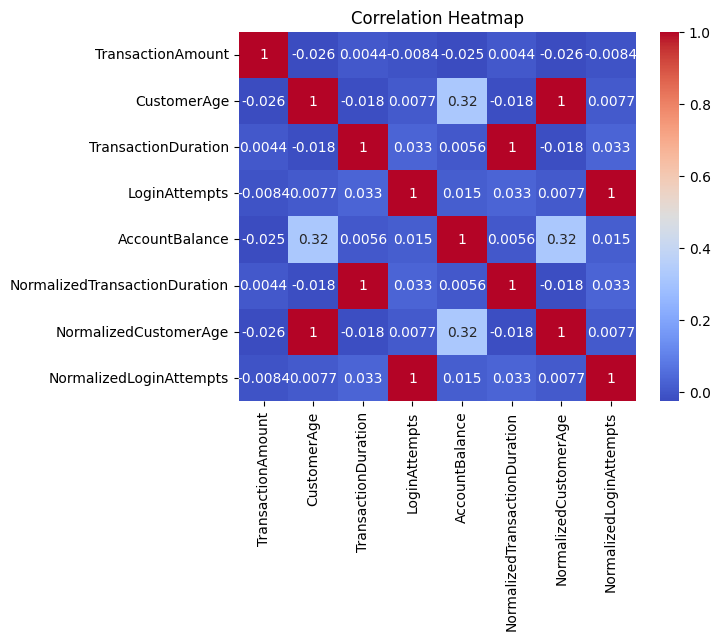

In [15]:
# Histploting and Correlation Heatmaps implementation
# Selecting only numerical values for correlation analysis
ds_numerical_drop = dataset.drop(['NormalizedTransactionAmount', 'NormalizedAccountBalance'], axis=1)
corr_matrix = ds_numerical_drop.select_dtypes(include=[np.number]).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Trends and Patterns

We have a strong positive correlation with CustomerAge and AccountBalance as shown on Heatmap, which means depends on the customer age, the account balance could grow.

# Potential Biases

Age bias which could appear beacuse of the strong correlation which we occure between Customer Age and Account Balance.

# 1.1.4 Model Development and Evaluation

Train and evaluate learning models, e.g., supervised: linear regression, decision trees, and unsupervised: K-means.

Use appropriate evaluation metrics, e.g., R-squared, accuracy, precision, recall, F1-score, etc.

Provide a clear interpretation of the model performance using classification report, tables or graphs.

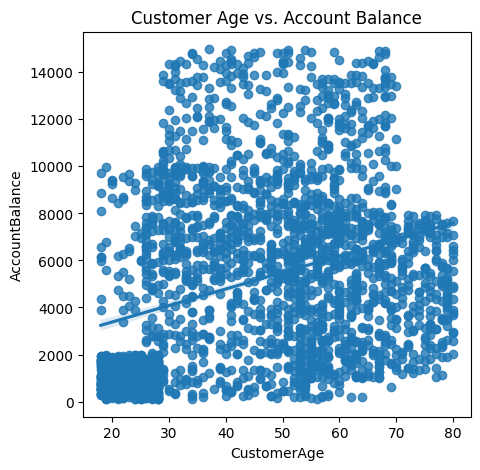

In [23]:
plt.figure(figsize=(5,5))
sns.regplot(x='CustomerAge', y='AccountBalance', data=dataset)
plt.title('Customer Age vs. Account Balance')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Silhouette Score is a common metric for unsupervised learning
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
x=dataset[['CustomerAge']]
y=dataset['AccountBalance']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
normalised_x = dataset[['NormalizedAccountBalance']]
normalised_y = dataset['NormalizedCustomerAge']

normalised_x_train, normalised_x_test, normalised_y_train, normalised_y_test = train_test_split(normalised_x, normalised_y, test_size=0.2, random_state=42)

# Linear Regression Model

In [63]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(normalised_x_train, normalised_y_train)

LinearRegression()

Text(0, 0.5, 'Normalized Customer Age')

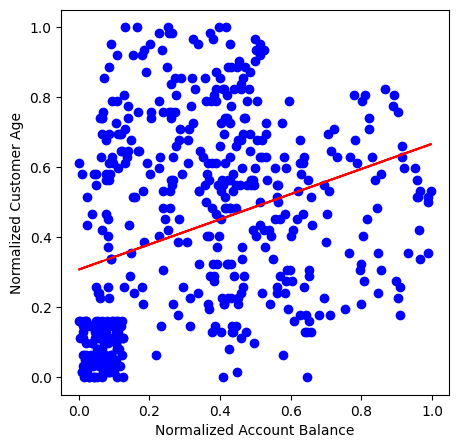

In [64]:
lr_unseen_normalised_predictions = linear_regression_model.predict(normalised_x_test)
plt.figure(figsize=(5,5))
plt.scatter(normalised_x_test, normalised_y_test, color='blue', label='Actual')
plt.plot(normalised_x_test, lr_unseen_normalised_predictions, color='red', label='Predicted')
plt.xlabel('Normalized Account Balance')
plt.ylabel('Normalized Customer Age')

Text(0, 0.5, 'Normalized Customer Age')

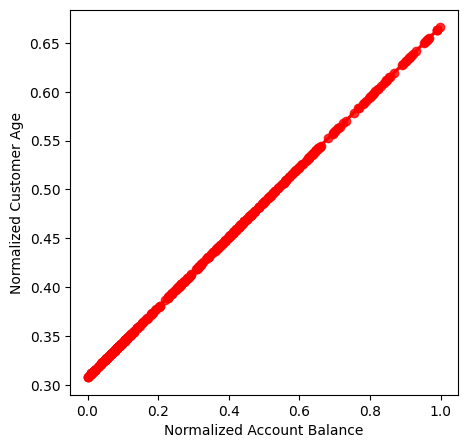

In [65]:
plt.figure(figsize=(5,5))
sns.regplot(x=normalised_x_test, y=lr_unseen_normalised_predictions, color='red', label='Predicted')
plt.xlabel('Normalized Account Balance')
plt.ylabel('Normalized Customer Age')

# Decision Tree Model

In [53]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

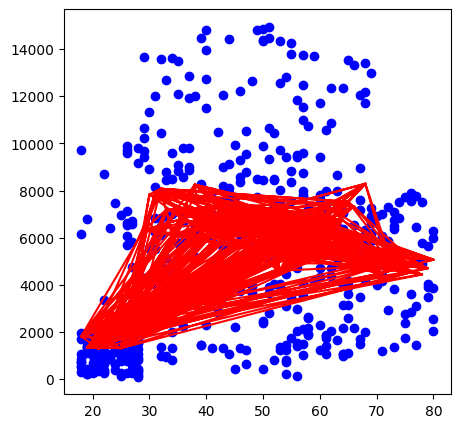

In [58]:
 dt_unseen_predictions = decision_tree_model.predict(x_test)
 plt.figure(figsize=(5,5))
 plt.scatter(x_test, y_test, color='blue', label='Actual')
 plt.plot(x_test, dt_unseen_predictions, color='red', label='Predicted')


Text(0, 0.5, 'Customer Age')

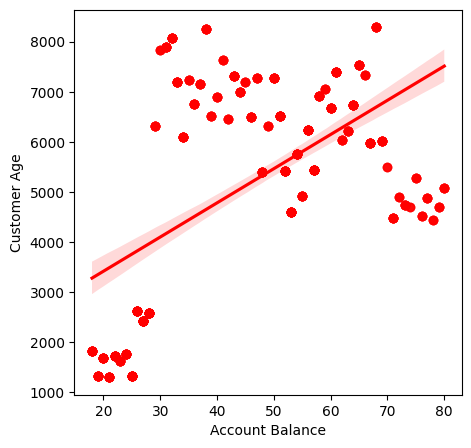

In [61]:
 plt.figure(figsize=(5,5))
 sns.regplot(x=x_test, y=dt_unseen_predictions, color='red', label='Predicted')
 plt.xlabel('Account Balance')
 plt.ylabel('Customer Age')

# K-means

In [85]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataset[['NormalizedAccountBalance', 'NormalizedCustomerAge']])

KMeans(n_clusters=3, random_state=42)

In [86]:
# Adding cluster labels to the dataset
dataset['Cluster'] = kmeans.labels_

In [87]:
# Evaluate the K-means model using Silhouette Score
silhouette_avg = silhouette_score(dataset[['NormalizedAccountBalance', 'NormalizedCustomerAge']], dataset['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.48619893572064976


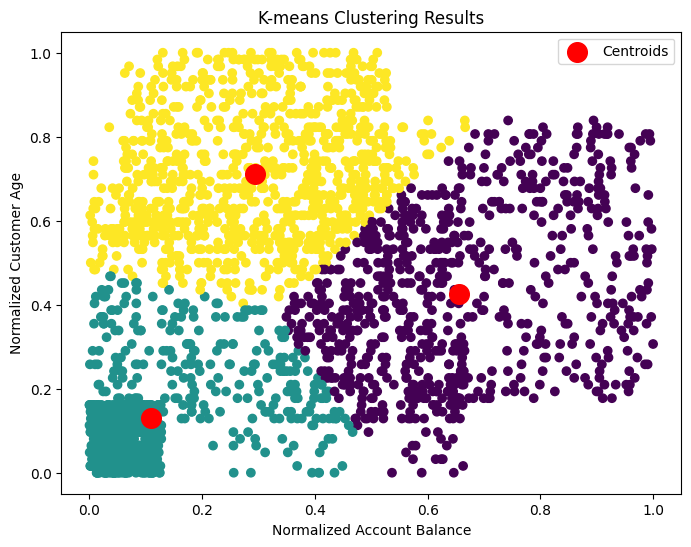

In [88]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(dataset['NormalizedAccountBalance'], dataset['NormalizedCustomerAge'], c=dataset['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Normalized Account Balance')
plt.ylabel('Normalized Customer Age')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

In [91]:
#Further analysis of clusters (example)
#Calculating the average account balance for each cluster
cluster_stats = dataset.groupby('Cluster')['AccountBalance'].mean()
print("Average Account Balance per Cluster:\n",cluster_stats)
cluster_stats2 = dataset.groupby('Cluster')['CustomerAge'].mean()
print("Average Customer Age per Cluster:\n",cluster_stats2)

Average Account Balance per Cluster:
 Cluster
0    9863.971537
1    1731.633735
2    4461.857811
Name: AccountBalance, dtype: float64
Average Customer Age per Cluster:
 Cluster
0    44.382313
1    26.072600
2    62.117010
Name: CustomerAge, dtype: float64


# 1.1.5 Ethical Considerations


Highlight potential biases or fairness issues in the dataset or models.

Suggest practical strategies for mitigating these ethical challenges.

# Natural Language Processing and Deep Learning Coursework Part 2

# 1.2.1 Text Dataset Selection and Preprocessing


Select a publicly available text dataset, for example, IMDb reviews, Amazon product reviews, AG News, depending
on what you want to achieve.

Preprocess the dataset, for example, clean text, tokenize, remove stopwords, etc.

Use pre-trained embeddings, e.g., GloVe, Word2Vec for feature representation.

# 1.2.2 Deep Learning Model Implementation


Design and train a neural network, e.g., RNN, LSTM for a text-based task, e.g., sentiment analysis.

Clearly explain the model architecture, e.g., embedding layers, hidden layers, activation functions, and
hyperparameter tuning

# 1.2.3 Evaluation and Insights


Use evaluation metrics, e.g., accuracy, precision, recall, loss curves.

Provide visualizations, e.g., learning curves, confusion matrices, to explain findings, where possible.

Highlight strengths, limitations and areas for improvement.